In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from shapely.geometry import Point,Polygon, MultiPolygon, shape
import geopandas as gpd
import descartes
import random

In [9]:
## reading-in relevant files
from pathlib import Path

datapath = Path('../data/')

mich_path = datapath / 'tl_2020_26_cousub_michigan'
oreg_path = datapath / 'tl_2020_41_cousub_oregon'
virg_path = datapath / 'tl_2020_51_cousub_virginia'

mich_df = gpd.read_file(mich_path / 'tl_2020_26_cousub.shp')
oreg_df = gpd.read_file(oreg_path / 'tl_2020_41_cousub.shp')
virg_df = gpd.read_file(virg_path / 'tl_2020_51_cousub.shp')

Text(0.5, 114.0, 'Longitude')

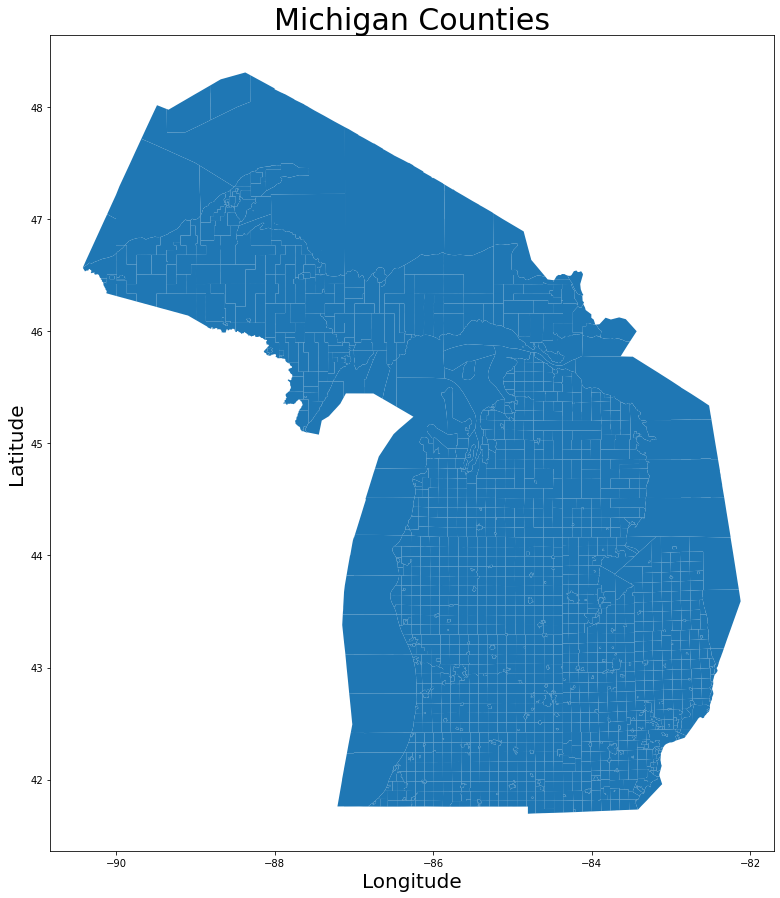

In [18]:
fig, ax = plt.subplots(figsize = (15,15))
mich_df.plot(ax=ax)
ax.set_title('Michigan Counties',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

Text(0.5, 216.8652675181311, 'Longitude')

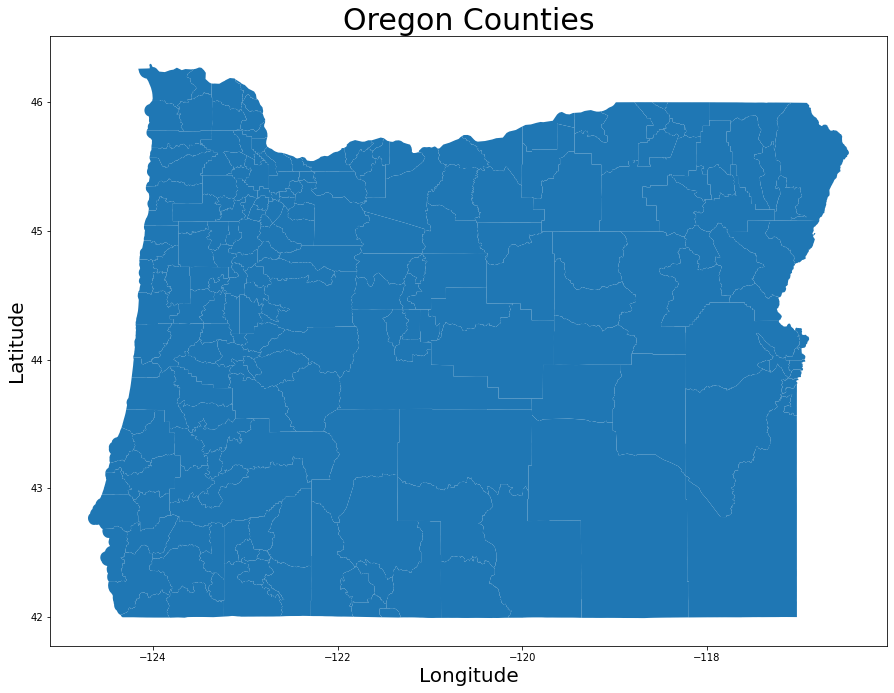

In [19]:
fig, ax = plt.subplots(figsize = (15,15))
oreg_df.plot(ax=ax)
ax.set_title('Oregon Counties',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})